In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # Method Chain 1 (Load data,set axis titles, find all question marks in the data and dropped it)

income = (
        pd.read_csv("C:/Users/ongka/data301/solo-project/data/raw/raw")
        .set_axis(['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],axis=1,inplace=False)
        .replace('?',np.nan)
        .dropna()
        .replace("?",np.nan)
        .dropna()
    
)

# Method Chain 2 (Dropped columns, changed values of income to 0 (below 50k) and 1 (above 50k))

income2 = (
        income
        .drop(['fnlwgt','education-num','occupation','capital-gain','capital-loss'],axis=1)
        .replace(' <=50K','0')
        .replace(' >50K','1')
)

# Method Chain 3 (Dropped columns, changed values of education to 0 (high school graduate) and 1 (bachelors degree), and removed all other education types.)

income3 = (
        income
        .drop(['fnlwgt','education-num','occupation','capital-gain','capital-loss'],axis=1)
        .replace(' Bachelors',1)
        .replace(' HS-grad',0)
        .replace([' 11th',' Some-college',' Prof-school',' Assoc-acdm',' Assoc-voc',' 9th',' 7th-8th',' 12th',' Masters',' 1st-4th',' 10th',' Doctorate',' 5th-6th',' Preschool'],np.nan)
        .dropna()
)
income3


,age,workclass,education,marital-status,relationship,race,sex,hours-per-week,native-country,income
0,50,Self-emp-not-inc,1.0,Married-civ-spouse,Husband,White,Male,13,United-States,<=50K
1,38,Private,0.0,Divorced,Not-in-family,White,Male,40,United-States,<=50K
3,28,Private,1.0,Married-civ-spouse,Wife,Black,Female,40,Cuba,<=50K
6,52,Self-emp-not-inc,0.0,Married-civ-spouse,Husband,White,Male,45,United-States,>50K
8,42,Private,1.0,Married-civ-spouse,Husband,White,Male,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...
32546,43,Private,0.0,Married-civ-spouse,Husband,White,Male,40,Mexico,<=50K
32556,40,Private,0.0,Married-civ-spouse,Husband,White,Male,40,United-States,>50K
32557,58,Private,0.0,Widowed,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,0.0,Never-married,Own-child,White,Male,20,United-States,<=50K


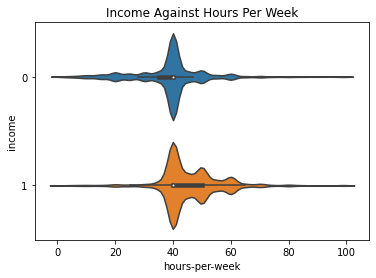

In [43]:
types = sns.violinplot(x=income2["hours-per-week"],y=income2["income"],data=income2,scale="width").set(title="Income Against Hours Per Week")

- Income Mapped Againsted Hours Per Week

    - Based on the graph, we can see a slight correlation between a higher income and more hours worked.
    - Below the 40 hours per week mark, there are more bumps along the way for the below 50k income group.
    - The individuals with around 20 to 30 hour per week could be part timers.
    - Above the 40 hours per week mark, there are more bumps along the way for the above 50k income group.
    - Due to some individuals working longer than 40 hours, they could make more than 50k a year due to the shear difference in hours worked while keeping the hourly wage the same.

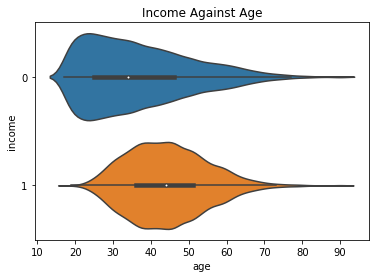

In [44]:
types = sns.violinplot(x=income2["age"],y=income2["income"],data=income2,scale="width").set(title="Income Against Age")

- Income Mapped Againsted Age

    - Based on the graph, we can see a correlation with higher income and age.
    - As young adults join the work force, they primarily work minimum wage jobs due to their limited skill sets.
    - As time goes on, they gradually become more higher skilled or enroll in college to become more specialised.
    - With more specialisation, they can commend higher pay due to a more in demand skill set.
    - As time goes on, they are able to get promoted or get better offers elsewhere.
    - An interesting observation with the 50k income group lies in the drop off starting at around age 46.
    - As they become older and less productive, their employer can hire a younger staff at a lower salary to do their job.
    - This could explain the start of a drop in the 50k income group.
    - However, this does not cause a rise in the below 50k income group.
    - One possible explanation could be that some in the 50k income group at around the age of 46 are able to retire comfortable without participating in the workforce. 

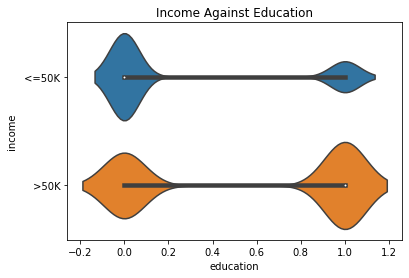

In [67]:
types = sns.violinplot(x=income3["education"],y=income3["income"],data=income3,scale="width").set(title="Income Against Education")

- Income Mapped Against Education

    - Based on the graph, we can see a higher concentration of college graduates earning more than 50k income a year.
    - Those with a bachelor's degree on average will earn more than 50k compared to those with only a high school diploma.
    - Those with college degrees make up a greater size of the data,
    - A smaller than average size of high school graduates will make over 50k income a year.
    